# Data Science Internship at Data Glacier

## Final Project: Predicting the persistency of a drug (Healthcare) - Part 3

#### Problem Description

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

With an objective to gather insights on the factors that are impacting the persistency, a classification
model will be built for the given dataset.

***1. Loading the packages and dataset***

In [1]:
# Loading package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the dataset
df = pd.read_excel("data/Healthcare_dataset.xlsx", sheet_name="Dataset")

***2. Creating an statistical summary***

In [3]:
# Profile Report
report = ProfileReport(df)

# Printing the report
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Approach 1 - Harshith Sakala Santhosh

***3. Treating outliers***

In [4]:
# Loading the dataset
main_dataset = pd.read_excel("data/Healthcare_dataset.xlsx", sheet_name="Dataset")

* Dexa_Freq_During_Rx

0.0 3.0
The inter quartile range of the dexa_freq_During_Rx entire data regardless of output label is :3.0
The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :-4.5 The uppper bound of the dexa_freq_During_Rx data is :7.5


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

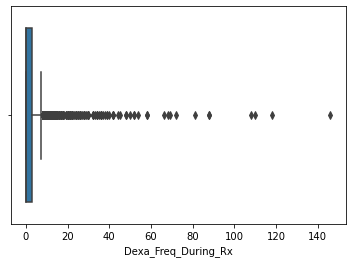

In [5]:
# Ploting the boxplot for Dexa_Freq_During_Rx
q1,q2=np.percentile(main_dataset['Dexa_Freq_During_Rx'],[25,75])
print(q1,q2)
IQR=q2-q1
print("The inter quartile range of the dexa_freq_During_Rx entire data regardless of output label is :{inter}".format(inter=IQR))
lower_bound=q1-(1.5*IQR)
upper_bound=q2+(1.5*IQR)
print("The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :{lower}".format(lower=lower_bound),"The uppper bound of the dexa_freq_During_Rx data is :{upper}".format(upper=upper_bound))
sns.boxplot(x=main_dataset['Dexa_Freq_During_Rx'])

The Inter Quartile Range of  dexa frequency values for persistency is 3.0
The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :-13.5
The upper bound of the dexa_freq_During_Rx data is :22.5


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

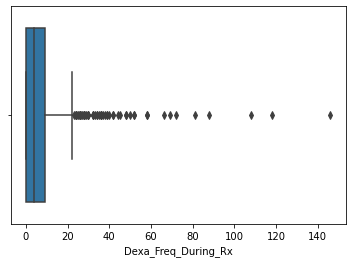

In [6]:
#Plot the Dexa freq values where persistencyflag==Persistent
number_of_persistent_values_in_Dexa=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
q1,median,q2= np.percentile(number_of_persistent_values_in_Dexa['Dexa_Freq_During_Rx'],[25,50,75])

IQR_Persistent=q2-q1
print("The Inter Quartile Range of  dexa frequency values for persistency is {Pers}".format(Pers=IQR))
lower_bound_pers=q1-(1.5*IQR_Persistent)
upper_bound_pers=q2+(1.5*IQR_Persistent)
print("The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :{lower}".format(lower=lower_bound_pers))
print("The upper bound of the dexa_freq_During_Rx data is :{upper}".format(upper=upper_bound_pers))
sns.boxplot(x=number_of_persistent_values_in_Dexa['Dexa_Freq_During_Rx'])


The Inter Quartile Range of  dexa frequency values for persistency is 3.0
The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :0.0
The upper bound of the dexa_freq_During_Rx data is :0.0


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

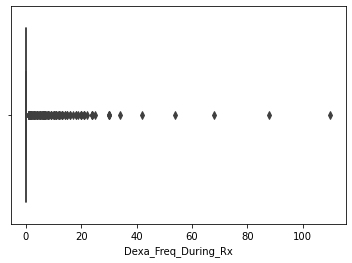

In [7]:
#Plot the Dexa freq values where persistencyflag==Non-Persistent

number_of_non_persistent_values_in_Dexa=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
q1,q2= np.percentile(number_of_non_persistent_values_in_Dexa['Dexa_Freq_During_Rx'],[25,75])
IQR_Non_Persistent=q2-q1
print("The Inter Quartile Range of  dexa frequency values for persistency is {Pers}".format(Pers=IQR))
lower_bound_Non_pers=q1-(1.5*IQR_Non_Persistent)
upper_bound_Non_pers=q2+(1.5*IQR_Non_Persistent)
print("The lower bound of the dexa_freq_During_Rx entire data regardless of output label is :{lower}".format(lower=lower_bound_Non_pers))
print("The upper bound of the dexa_freq_During_Rx data is :{upper}".format(upper=upper_bound_Non_pers))
sns.boxplot(x=number_of_non_persistent_values_in_Dexa['Dexa_Freq_During_Rx'])

# Since it is clear that there are outliers present in both values and there is variance observed between the distribution of these two value distributions.
# The outlier values for both Persistent and Non_persistent will be replace by taking the median values of respected distributions and also the median value for Non_persistent data is 0.


The minimum value of Dexa_Freq_During_Rx is 0.0
The maximum value of Dexa_Freq_During_Rx is 22.0
Dexa_Freq_During_Rx               0.0
Persistency_Flag       Non-Persistent
dtype: object


<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

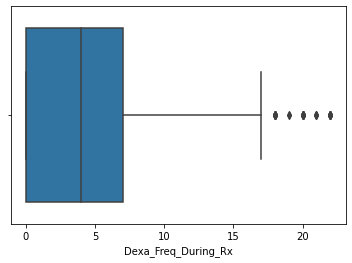

In [8]:
# Dealing with outliers by replacing the outlier values by median of both persistent and non persistent dexa freq values
persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
median_value=persistent_data['Dexa_Freq_During_Rx'].median()
main_dataset['Dexa_Freq_During_Rx'] = np.where((main_dataset['Persistency_Flag'] == 'Persistent') & (main_dataset['Dexa_Freq_During_Rx']>22.5),median_value , main_dataset['Dexa_Freq_During_Rx'])
main_dataset['Dexa_Freq_During_Rx'] = np.where((main_dataset['Persistency_Flag'] == 'Non-Persistent') & (main_dataset['Dexa_Freq_During_Rx']>0),0 , main_dataset['Dexa_Freq_During_Rx'])
print("The minimum value of Dexa_Freq_During_Rx is {min}".format(min=main_dataset['Dexa_Freq_During_Rx'].min()))
print("The maximum value of Dexa_Freq_During_Rx is {max}".format(max=main_dataset['Dexa_Freq_During_Rx'].max()))
persistent1_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
non_persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
print(non_persistent_data[['Dexa_Freq_During_Rx','Persistency_Flag']].max())
#Dexa freq values for persistent
sns.boxplot(x=persistent1_data['Dexa_Freq_During_Rx'])





<AxesSubplot:xlabel='Dexa_Freq_During_Rx'>

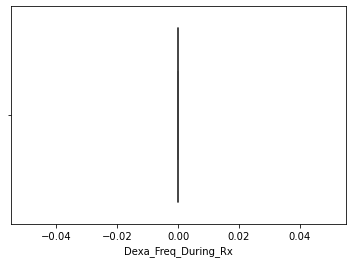

In [9]:
#Dexa freq values for non-persistent
sns.boxplot(x=non_persistent_data['Dexa_Freq_During_Rx'])





*   Count_Of_Risks






The Inter Quartile Range of  count of risks for persistency is 3.0
The lower bound of the count of risks is :-0.5
The upper bound of the count of risks data is :3.5


<AxesSubplot:xlabel='Count_Of_Risks'>

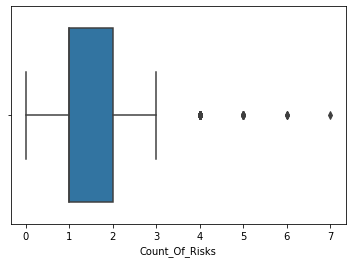

In [10]:
#Plot count of risks for persistent values
number_of_persistent_values_in_count_of_risks=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
q1,median,q2= np.percentile(number_of_persistent_values_in_Dexa['Count_Of_Risks'],[25,50,75])

IQR_Persistent=q2-q1
print("The Inter Quartile Range of  count of risks for persistency is {Pers}".format(Pers=IQR))
lower_bound_pers=q1-(1.5*IQR_Persistent)
upper_bound_pers=q2+(1.5*IQR_Persistent)
print("The lower bound of the count of risks is :{lower}".format(lower=lower_bound_pers))
print("The upper bound of the count of risks data is :{upper}".format(upper=upper_bound_pers))
sns.boxplot(x=number_of_persistent_values_in_Dexa['Count_Of_Risks'])

The Inter Quartile Range of  count of risks values for persistency is 3.0
The lower bound of the count of risksis :-3.0
The upper bound of the count of risks data is :5.0


<AxesSubplot:xlabel='Count_Of_Risks'>

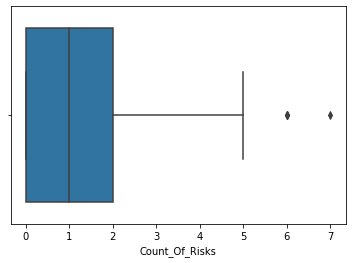

In [11]:
#Plot count of risks for non-persistent values
number_of_non_persistent_values_in_count_of_risks=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
q1,q2= np.percentile(number_of_non_persistent_values_in_count_of_risks['Count_Of_Risks'],[25,75])
IQR_Non_Persistent=q2-q1
print("The Inter Quartile Range of  count of risks values for persistency is {Pers}".format(Pers=IQR))
lower_bound_Non_pers=q1-(1.5*IQR_Non_Persistent)
upper_bound_Non_pers=q2+(1.5*IQR_Non_Persistent)
print("The lower bound of the count of risksis :{lower}".format(lower=lower_bound_Non_pers))
print("The upper bound of the count of risks data is :{upper}".format(upper=upper_bound_Non_pers))
sns.boxplot(x=number_of_non_persistent_values_in_Dexa['Count_Of_Risks'])


The minimum value of Count_Of_Risks is 0.0
The maximum value of Count_Of_Risks is 22.0
Count_Of_Risks                 5.0
Persistency_Flag    Non-Persistent
dtype: object


<AxesSubplot:xlabel='Count_Of_Risks'>

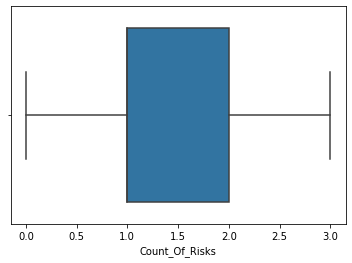

In [12]:
# Similar to previous feature, replacing all outliers with median values of both persistent values
persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
median_value=persistent_data['Count_Of_Risks'].median()
persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
non_persistency_median_value=persistent_data['Count_Of_Risks'].median()
main_dataset['Count_Of_Risks'] = np.where((main_dataset['Persistency_Flag'] == 'Persistent') & (main_dataset['Count_Of_Risks']>3.5),median_value , main_dataset['Count_Of_Risks'])
main_dataset['Count_Of_Risks'] = np.where((main_dataset['Persistency_Flag'] == 'Non-Persistent') & (main_dataset['Count_Of_Risks']>5),non_persistency_median_value, main_dataset['Count_Of_Risks'])
print("The minimum value of Count_Of_Risks is {min}".format(min=main_dataset['Dexa_Freq_During_Rx'].min()))
print("The maximum value of Count_Of_Risks is {max}".format(max=main_dataset['Dexa_Freq_During_Rx'].max()))
persistent1_data=main_dataset[main_dataset['Persistency_Flag']=='Persistent']
non_persistent_data=main_dataset[main_dataset['Persistency_Flag']=='Non-Persistent']
print(non_persistent_data[['Count_Of_Risks','Persistency_Flag']].max())
sns.boxplot(x=persistent1_data['Count_Of_Risks'])




<AxesSubplot:xlabel='Count_Of_Risks'>

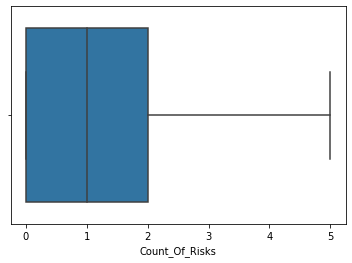

In [13]:
#Boxplot of Count of Risks for Non-persistent values
sns.boxplot(x=non_persistent_data['Count_Of_Risks'])

Both numerical variables do not present outliers. One more transformation that is necessary before proceeding with the exploratory analysis and modeling steps is related to encoding the categorical variables. Let's perform that using the function LabelEncoder from the sklearn.preprocessing.

***4. Encoding categorical variables***

In [14]:
numerical_data_frame=main_dataset[['Dexa_Freq_During_Rx','Count_Of_Risks']]
print(numerical_data_frame.head(10))
main_dataset.drop(['Dexa_Freq_During_Rx','Count_Of_Risks'],axis=1,inplace=True)
print(main_dataset.columns)


   Dexa_Freq_During_Rx  Count_Of_Risks
0                  0.0             0.0
1                  0.0             0.0
2                  0.0             2.0
3                  0.0             1.0
4                  0.0             1.0
5                  0.0             2.0
6                  0.0             1.0
7                  0.0             1.0
8                  0.0             1.0
9                  0.0             1.0
Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Scree

In [15]:
main_dataset=main_dataset.apply(LabelEncoder().fit_transform)

***5. Creating the transformed dataset and visualizing it***

In [16]:
# Creating a new dataframe to hold all the transformed variables
transformed_dataframe = pd.concat([pd.DataFrame(main_dataset), pd.DataFrame(numerical_data_frame, columns=['Dexa_Freq_During_Rx','Count_Of_Risks'])], axis=1)

# Vizualizing the new dataframe after transformation
transformed_dataframe.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,1,1,2,1,4,3,5,0,1,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1111,0,1,1,1,4,0,5,0,1,...,0,0,0,0,0,0,0,0,0.0,0.0
2,2222,0,0,3,0,0,1,5,0,1,...,1,0,0,0,0,0,0,0,0.0,2.0
3,2758,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0.0,1.0
4,2869,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0.0,1.0


### Approach 2 - Mario Rodrigues Peres

***3. Treating outliers***

In [17]:
# Creating a copy of df
df_copy = df.copy()

# Creating a new dataframe to hold all the categorical and boolean variables, including the target
# variable.
df_obj = df.select_dtypes(include='object')

# Creating a new dataframe to hold all the numeric variables
df_num = df.drop(columns=df_obj.columns)

# Copying the variable Persistency_Flag into the df_num
df_num['Persistency_Flag'] = df['Persistency_Flag']

As mentioned in a previous report, the dataset does not contain NA values and duplicated registers. However, a few outliers were observed in both numerical variables. Let's first plot a boxplot, considering the target classes separately. After that, as all outliers were high values, the upper limit threshold was calculated based on the rule 1.5 times the interquartile range (IQR). Any value above this treshold was considered outlier as presented in the boxplots. The outlier values were replaced by these upper limit thresholds.

* Dexa_Freq_During_Rx

Persistency_Flag
Non-Persistent    AxesSubplot(0.125,0.125;0.775x0.755)
Persistent        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

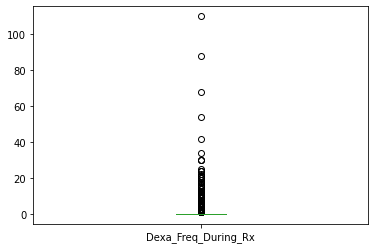

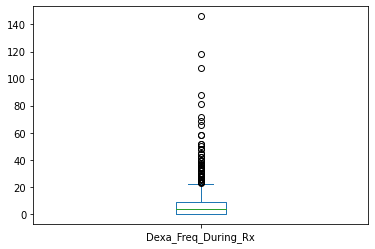

In [18]:
# Ploting the boxplot for the 'Dexa_Freq_During_Rx' considering the target variables
df_num[['Persistency_Flag', 'Dexa_Freq_During_Rx']].groupby('Persistency_Flag').plot(kind='box')

In [19]:
# Calculating the outlier threashold for the 'Dexa_Freq_During_Rx' considering the Persistency_Flag
quartiles = df_num[['Persistency_Flag', 'Dexa_Freq_During_Rx']].groupby('Persistency_Flag').quantile([0.25,0.75])

upperLimitOutlier0 = float(quartiles.iloc[1] + 1.5 * abs(np.subtract(quartiles.iloc[0], quartiles.iloc[1])))
upperLimitOutlier1 = float(quartiles.iloc[3] + 1.5 * abs(np.subtract(quartiles.iloc[2], quartiles.iloc[3])))

print(upperLimitOutlier0)
print(upperLimitOutlier1)

0.0
22.5


In [20]:
# Creating a new variable 'Dexa_Freq_During_Rx_TreatedOutlier'. This variable includes the transformation of
# outliers to the max value of the boxplot that is not outlier (tip of the upper tail). In this case, if the
# 'Dexa_Freq_During_RX' was higher than 0 or 22.5 for non-persistent and persistent cases, these were changed
# to these respective values (which are the upper limit values for the outliers)
Dexa_Freq_During_Rx_list = []
for i in range(len(df_num)):
    if df_num['Persistency_Flag'].iloc[i] == 'Non-Persistent':
        if df_num['Dexa_Freq_During_Rx'].iloc[i] > 0:
            Dexa_Freq_During_Rx_list.append(upperLimitOutlier0)
        else:
            Dexa_Freq_During_Rx_list.append(df_num['Dexa_Freq_During_Rx'].iloc[i])
    elif df_num['Persistency_Flag'].iloc[i] == 'Persistent':
        if df_num['Dexa_Freq_During_Rx'].iloc[i] > 22.5:
            Dexa_Freq_During_Rx_list.append(upperLimitOutlier1)
        else:
            Dexa_Freq_During_Rx_list.append(df_num['Dexa_Freq_During_Rx'].iloc[i])

df_num['Dexa_Freq_During_Rx_TreatedOutlier'] = Dexa_Freq_During_Rx_list

* Count_Of_Risks

Persistency_Flag
Non-Persistent    AxesSubplot(0.125,0.125;0.775x0.755)
Persistent        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

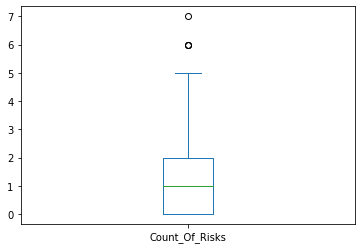

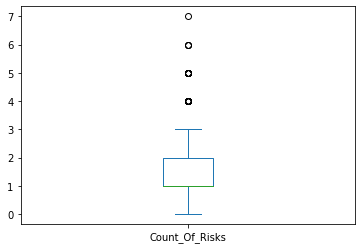

In [21]:
# Ploting the boxplot for the 'Count_Of_Risks' considering the target variables
df_num[['Persistency_Flag', 'Count_Of_Risks']].groupby('Persistency_Flag').plot(kind='box')

In [22]:
# Calculating the outlier threashold for the 'Count_Of_Risks' considering the Persistency_Flag
quartiles = df_num[['Persistency_Flag', 'Count_Of_Risks']].groupby('Persistency_Flag').quantile([0.25,0.75])

upperLimitOutlier0 = float(quartiles.iloc[1] + 1.5 * abs(np.subtract(quartiles.iloc[0], quartiles.iloc[1])))
upperLimitOutlier1 = float(quartiles.iloc[3] + 1.5 * abs(np.subtract(quartiles.iloc[2], quartiles.iloc[3])))

print(upperLimitOutlier0)
print(upperLimitOutlier1)

5.0
3.5


In [23]:
# Creating a new variable 'Count_Of_Risks_TreatedOutlier'. This variable includes the transformation of
# outliers to the max value of the boxplot that is not outlier (tip of the upper tail) as all outliers were
# higher values too. In this case, if the 'Count_Of_Risks' was higher than 5 or 3.5 for non-persistent and
# persistent cases, these were changed to these respective values (which are the upper limit values for the
# outliers)
Count_Of_Risks_list = []
for i in range(len(df_num)):
    if df_num['Persistency_Flag'].iloc[i] == 'Non-Persistent':
        if df_num['Count_Of_Risks'].iloc[i] > 5:
            Count_Of_Risks_list.append(upperLimitOutlier0)
        else:
            Count_Of_Risks_list.append(df_num['Count_Of_Risks'].iloc[i])
    elif df_num['Persistency_Flag'].iloc[i] == 'Persistent':
        if df_num['Count_Of_Risks'].iloc[i] > 3.5:
            Count_Of_Risks_list.append(upperLimitOutlier1)
        else:
            Count_Of_Risks_list.append(df_num['Count_Of_Risks'].iloc[i])

df_num['Count_Of_Risks_TreatedOutlier'] = Count_Of_Risks_list

In [24]:
# Removing the variables before transformation and the target
df_num.drop(columns=['Dexa_Freq_During_Rx','Count_Of_Risks', 'Persistency_Flag'], inplace=True)

Both numerical variables do not present outliers. One more transformation that is necessary before proceeding with the exploratory analysis and modeling steps is related to encoding the categorical variables. Let's perform that using the function LabelEncoder from the sklearn.preprocessing.

***4. Encoding categorical variables***

In [25]:
# Encoding the categorical variables
for col in df_obj.columns:
    df_obj[col] = LabelEncoder().fit_transform(df_obj[col])

***5. Creating the transformed dataset and visualizing it***

In [26]:
# Creating a new dataframe to hold all the transformed variables
transformed_df = pd.concat([pd.DataFrame(df_obj), pd.DataFrame(df_num, columns=['Dexa_Freq_During_Rx_TreatedOutlier','Count_Of_Risks_TreatedOutlier'])], axis=1)

# Vizualizing the new dataframe after transformation
transformed_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Dexa_Freq_During_Rx_TreatedOutlier,Count_Of_Risks_TreatedOutlier
0,0,1,1,2,1,4,3,5,0,1,...,0,0,0,0,0,0,0,0,0.0,0.0
1,1111,0,1,1,1,4,0,5,0,1,...,0,0,0,0,0,0,0,0,0.0,0.0
2,2222,0,0,3,0,0,1,5,0,1,...,1,0,0,0,0,0,0,0,0.0,2.0
3,2758,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0.0,1.0
4,2869,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0.0,1.0


### Approach 3 - Alexis Michael-Igbokwe

***3. Treating outliers***

### Final Project: Predicting the persistency of a drug (Healthcare) - Part 3

Find the outlier of the numerical value using zscore

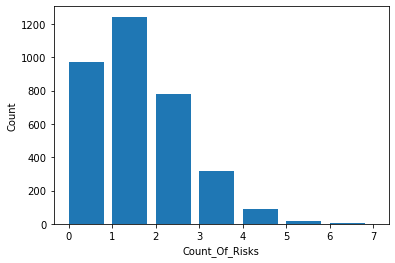

In [27]:
# Plot histogram to check distribution of column

plt.hist(df.Count_Of_Risks, bins=7, width=0.8)
plt.xlabel('Count_Of_Risks')
plt.ylabel('Count')
plt.show()

In [28]:
# Checking for descriptive statistics

df.Count_Of_Risks.describe()

count    3424.000000
mean        1.239486
std         1.094914
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Count_Of_Risks, dtype: float64

In [29]:
df.Count_Of_Risks.mean()

1.2394859813084111

In [30]:
df.Count_Of_Risks.std()

1.094914477979503

In [31]:
upper_limit = df.Count_Of_Risks.mean() + 3*df.Count_Of_Risks.std()
upper_limit

4.52422941524692

In [32]:
lower_limit = df.Count_Of_Risks.mean() - 3*df.Count_Of_Risks.std()
lower_limit

-2.0452574526300977

In [33]:
outlier = df[(df.Count_Of_Risks>upper_limit) | (df.Count_Of_Risks<lower_limit)]
outlier.shape

(23, 69)

In [34]:
df['zscore'] = (df.Count_Of_Risks - df.Count_Of_Risks.mean()) / df.Count_Of_Risks.std()
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,zscore
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,-1.132039
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,-1.132039
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,2,0.694588
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,-0.218726
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,-0.218726


In [35]:
zsc = df[df['zscore'] > 3]

Outlier in Dexa Frequency during RX

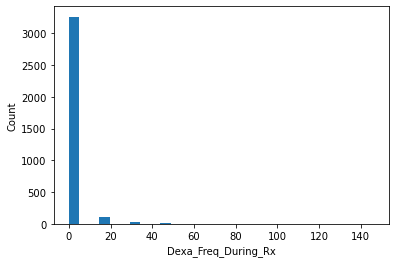

In [36]:
# Plot histogram to check distribution of column

plt.hist(df.Dexa_Freq_During_Rx, bins=10, width=5.0)
plt.xlabel('Dexa_Freq_During_Rx')
plt.ylabel('Count')
plt.show()

In [37]:
df.Dexa_Freq_During_Rx.describe()

count    3424.000000
mean        3.016063
std         8.136545
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       146.000000
Name: Dexa_Freq_During_Rx, dtype: float64

In [38]:
upper_limit1 = df.Dexa_Freq_During_Rx.mean() + 3*df.Dexa_Freq_During_Rx.std()
upper_limit1

27.425698069039147

In [39]:
lower_limit1 = df.Dexa_Freq_During_Rx.mean() - 3*df.Dexa_Freq_During_Rx.std()
lower_limit1

-21.393571900814845

In [40]:
outlier1 = df[(df.Dexa_Freq_During_Rx>upper_limit) | (df.Dexa_Freq_During_Rx<lower_limit)]
outlier1.shape

(774, 70)

Trnsformation of variables in Tscore_Bucket_During_Rx and Tscore_Bucket_Prior_Ntm

In [41]:
df.replace(to_replace={'>-2.5':1, '<=-2.5':0}, inplace=True)

In [42]:
df['Tscore_Bucket_During_Rx'].unique()

array([0, 'Unknown', 1], dtype=object)

Replace variables in the age bucket

In [43]:
df.replace()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,zscore
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,-1.132039
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,-1.132039
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,2,0.694588
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,-0.218726
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,1,-0.218726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,1,-0.218726
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,-1.132039
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,Y,N,N,N,N,N,N,1,-0.218726
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,0,-1.132039


Dropping features that indicates same information

In [44]:
df = df.drop(columns=['Ntm_Speciality', 'Ntm_Specialist_Flag'])